# High-Frequency Sleep Staging: Downstream Task Performance

This notebook creates publication figures showing how downstream task performance
varies with the temporal resolution of sleep stage predictions.

## Panels

1. **ISRUC Age Prediction** (left)
   - Task: Predict subject age from sleep stage transition patterns
   - Metric: RMSE (lower is better)
   - Baseline: Predicting mean age for all subjects

2. **ISRUC Sex Classification** (middle)
   - Task: Classify subject sex from sleep stage transition patterns
   - Metric: Macro F1 (higher is better)
   - Baseline: Random guessing (≈0.5 MF1)

3. **DODO vs DODH Device Classification** (right)
   - Task: Identify recording device from sleep patterns
   - Metric: Macro F1 (higher is better)
   - Baseline: Random guessing (≈0.5 MF1)

## Data Flow

```
predict-high-freq.py sweeps (logs/exp002/exp002a/sweep-*/)
        ↓
scripts/high-freq/anysleep_isruc_*.ipynb (feature extraction + random forest CV)
        ↓
scripts/final-figures/hf_scores.py (pre-computed scores)
        ↓
This notebook (visualization)
```

## Output

- `high-freq-panels.svg`: Three-panel figure for publication

## Dependencies

- `hf_scores.py`: Pre-computed RMSE/MF1 scores from downstream task experiments
- `isruc-info/*.xlsx`: ISRUC dataset metadata (age, sex) for baseline computation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, root_mean_squared_error

from hf_scores import isruc_age, isruc_sex, dodo_vs_dodh

In [2]:
# ISRUC age
metadata_files = ["./isruc-info/Details_subgroup_I_Submission.xlsx",
                  "./isruc-info/Details_subgroup_II_Submission.xlsx",
                  "./isruc-info/Details_subgroup_III_Submission.xlsx"]
subj_age_dict = {}
for metadata_file in metadata_files:
    metadata = pd.read_excel(metadata_file, header=2)[["Subject", "Age"]]
    metadata = metadata[metadata["Age"].astype(str).str.isdecimal()]
    metadata["Subject"] = f"isruc-sg{len(metadata_file.split('_')[-2])}_" + metadata["Subject"].astype(str).str.replace(
        "Rec.", "")
    metadata["Age"] = metadata["Age"].astype(int)
    subj_age_dict.update(metadata.set_index("Subject")["Age"].to_dict())
subj_age_dict.update({k[:-1] + "2": v for k, v in subj_age_dict.items() if "isruc-sg2_" in k})

preds = []
labels = []
for subject_name in subj_age_dict.keys():
    preds.append(np.mean(list(subj_age_dict.values())))
    labels.append(subj_age_dict[subject_name])

isruc_age_base_rmse = root_mean_squared_error(labels, preds)

In [3]:
# ISRUC sex
subj_sex_dict = {}
for metadata_file in metadata_files:
    metadata = pd.read_excel(metadata_file, header=2)[["Subject", "Sex"]]
    metadata = metadata[metadata["Sex"].astype(str).str.match("F|M")]
    metadata["Subject"] = f"isruc-sg{len(metadata_file.split('_')[-2])}_" + metadata["Subject"].astype(str).str.replace(
        "Rec.", "")
    metadata["Sex"] = metadata["Sex"].astype(str).str.replace("F", "0").str.replace("M", "1").astype(int)
    subj_sex_dict.update(metadata.set_index("Subject")["Sex"].to_dict())
subj_sex_dict.update({k[:-1] + "2": v for k, v in subj_sex_dict.items() if "isruc-sg2_" in k})

isruc_sex_rnd_base_mf1s = []
for i in range(100):
    preds = []
    labels = []
    for subject_name in subj_sex_dict.keys():
        preds.append(np.random.choice([0, 1]))
        labels.append(subj_sex_dict[subject_name])

    precs, recs, f1s, _ = precision_recall_fscore_support(labels, preds, average=None)
    isruc_sex_rnd_base_mf1s.append(np.mean(f1s))

In [4]:
# DODO vs DODH
# 1 = DODH, 0 = DODO
subj_data_dict = {'119f9726-eb4c-5a0e-a7bb-9e15256149a1': 1, '3e842aa8-bcd9-521e-93a2-72124233fe2c': 1,
                  '1fa6c401-d819-50f5-8146-a0bb9e2b2516': 1, '37d0da97-9ae8-5413-b889-4e843ff35488': 1,
                  '67fa8e29-6f4d-530e-9422-bbc3aca86ed0': 1, '0d79f4b1-e74f-5e87-8e42-f9dd7112ada5': 1,
                  'bb474ab0-c2ce-573b-8acd-ef86b0fa26a2': 1, '769df255-2284-50b3-8917-2155c759fbbd': 1,
                  '844f68ba-265e-53e6-bf47-6c85d1804a7b': 1, 'd3cadb78-cb8c-5a6e-885c-392e457c68b1': 1,
                  '5bf0f969-304c-581e-949c-50c108f62846': 1, 'a25b2296-343b-53f6-8792-ada2669d466e': 1,
                  '25a6b2b0-4d09-561b-82c6-f09bb271d3be': 1, 'b5d5785d-87ee-5078-b9b9-aac6abd4d8de': 1,
                  '1da3544e-dc5c-5795-adc3-f5068959211f': 1, 'f2a69bdc-ed51-5e3f-b102-6b3f7d392be0': 1,
                  '18ede714-aba3-5ad8-bb1a-18fc9b1c4192': 1, 'a30245e3-4a71-565f-9636-92e7d2e825fc': 1,
                  '64959ac4-53b5-5868-a845-c7476e9fdf7b': 1, 'a4568951-bf87-5bbc-bc4f-28e93c360be6': 1,
                  'aa160c78-6da3-5e05-8fc9-d6c13e9f97e0': 1, '095d6e40-5f19-55b6-a0ec-6e0ad3793da0': 1,
                  '14c012bd-65b0-56f5-bc74-2dffcea69837': 1, '7ab8ff5f-a77f-567d-9882-f8bee0c3c9bf': 1,
                  '7d778801-88e7-5086-ad1d-70f31a371876': 1, 'a79d1f0e-c133-5aa0-8268-cdcc05825f0f': 0,
                  '2159377e-ebf3-5565-9014-1e2ae69dc1d2': 0, '7f5237b1-2196-5c8a-9543-a5aa70210ef4': 0,
                  '18482adf-1144-54ca-9e35-27f65c43a105': 0, '2e865ca9-e20f-5a6f-bd25-45d28cc9eab9': 0,
                  'b3706da5-748b-5dd1-a552-f57e4456cdf6': 0, 'cc3b4b63-4a6f-5f28-ac7e-62f83c271449': 0,
                  '4e3c4ac4-69e2-5347-a3b0-662c204d259d': 0, '79e8a04e-0fdd-53ae-bedc-d49d08e29103': 0,
                  'a65a9e69-cddf-5711-9a97-de8bfdeb08cc': 0, 'e72505f1-21be-5d66-b620-cfcfa2d754bc': 0,
                  'c11c730f-0b6b-580b-af31-d8f0ebbbdfce': 0, '100df108-eb57-5eaa-a413-f7e4436a7895': 0,
                  '730aba3b-e310-5be0-9eed-7c3123466834': 0, '742f1592-627c-54eb-bbb5-ccd55ffae33a': 0,
                  'cebd3520-4e77-5222-a614-d2888e6afc2b': 0, '6a7503ac-ab3a-5d5b-b474-4b0fe37748dd': 0,
                  'e6b7cbef-4c9d-5541-82e8-04810de0fb60': 0, 'a35a118e-e65e-5928-92a9-4354a6a0f4ce': 0,
                  'b2d3ccdd-395c-5dd2-81d9-252bcfc0c337': 0, 'fc10ee0b-b863-511b-bce8-4dfa7af8ac3a': 0,
                  'c03e27b0-4cb5-584f-aaea-8f1e1ed6513c': 0, 'ad47bc12-199c-5294-9cb8-4351bbbf7b5e': 0,
                  '4b72b905-5521-5c57-b666-e20ff9bb195f': 0, '32556393-bb57-560a-99e8-e09885219647': 0,
                  'aadc9e0c-b7c3-5a47-851d-f21971d10935': 0, '5b94ec8a-c34d-5e45-84d1-bec2ea965609': 0,
                  'eb95076c-c470-56a4-b788-ace310f061c6': 0, 'e59c45e0-0c0c-565f-84a9-6cf0ec5ef6c1': 0,
                  'd5181c33-a43b-5dfe-8ad7-0337facb092a': 0, '6e2aa933-c51c-5a31-8c7b-83da8d076a12': 0,
                  '039ce8ad-a7fa-5272-a3e3-1f4bfebdd087': 0, 'a6254c8a-f1b2-5736-b601-18245dd5e0a5': 0,
                  '02fb158a-a658-51ee-89cf-1e1dc2ebfde1': 0, 'f66bc75e-778b-5037-af86-b5275cd4c79f': 0,
                  '0416d51f-5d69-5326-b74a-a2e31a96a1ef': 0, 'c8110476-594c-533d-95bd-86147fccc987': 0,
                  '130f3f52-7d0a-551e-af61-2ee75455e5c9': 0, '52fbe46b-206c-584a-9f4f-1eb308e07bac': 0,
                  '83c1394e-9c69-5c11-9102-9ff8d59b1cfd': 0, '40e25dd4-6087-5747-b9c2-4838ada86b15': 0,
                  '90aef91a-252f-5ccc-a82e-78ea7ee9ca1f': 0, '16450f5a-9b65-5536-85e1-93816c8b89eb': 0,
                  '3dd35e7b-d7e2-516d-8a85-e0d58a59569f': 0, '22bea84c-5d23-5e49-bc2d-9764f883955b': 0,
                  'e8ec8ec4-dc48-50ce-985a-a06d87861030': 0, '47f45aa2-31c4-595b-bdb6-f1348bba062b': 0,
                  '03341d0d-5927-5838-8a5f-1b8ef39d8f57': 0, 'a0c91989-530f-5117-80c1-2488dbed683c': 0,
                  'c985916d-46a5-5c3e-9d50-a5a91f460bac': 0, '5ddbc68c-1283-5c27-952b-d7f102291bc2': 0,
                  'b3534fa3-7676-50dc-8412-07f0eff4f7a9': 0, '2d01dc34-f36c-562e-b24a-d20dc798fdfc': 0,
                  '30e8a05b-4cf1-5aa8-9ef7-28d6e2949ad5': 0, 'c31a47f9-e400-5841-a22b-521c81042603': 0}

dodo_vs_dodh_rnd_base_mf1s = []
for i in range(100):
    preds = []
    labels = []
    for subject_name in subj_data_dict.keys():
        preds.append(np.random.choice([0, 1]))
        labels.append(subj_data_dict[subject_name])

    precs, recs, f1s, _ = precision_recall_fscore_support(labels, preds, average=None)
    dodo_vs_dodh_rnd_base_mf1s.append(np.mean(f1s))

ISRUC age: [15.62856776 15.20529402 15.05531492 14.80840096 14.54957617 14.23630311
 13.91833903 13.87193452 13.94962917 13.95345639 14.02356074 14.13095405
 14.35548116 14.35367473]
ISRUC sex: [0.49965036 0.49552632 0.52760412 0.56666677 0.54288117 0.55417051
 0.59529117 0.5879636  0.58733875 0.589269   0.58264924 0.57817078
 0.56121454 0.57809093]
DODO vs DODH: [0.62907349 0.69033307 0.67342626 0.64556419 0.73090466 0.72792164
 0.79652217 0.89430991 0.90605732 0.88654404 0.8904269  0.86953901
 0.84200573 0.82151951]


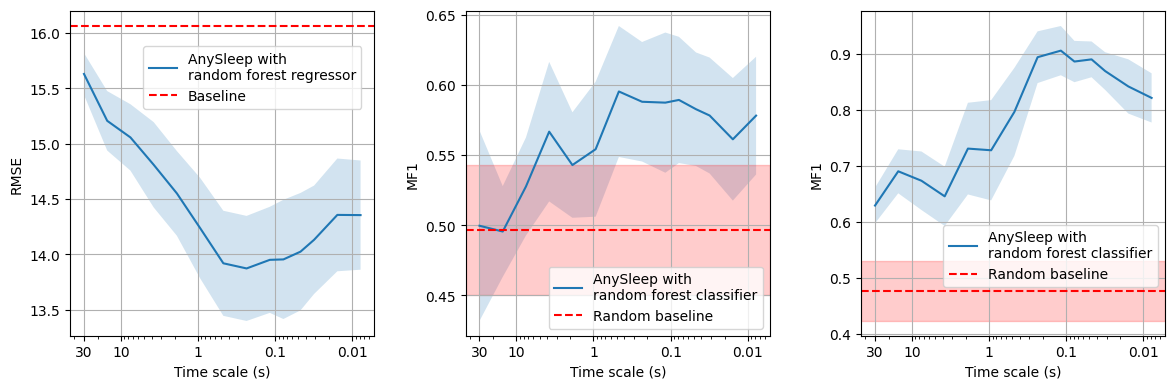

In [5]:
_, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

# panel ISRUC age prediction
scores_to_plot = {}
for i, (model_run, rmses_model) in enumerate(isruc_age.items()):
    for sr in rmses_model.keys():
        if sr not in scores_to_plot:
            scores_to_plot[sr] = []
        scores_to_plot[sr].append(rmses_model[sr])

scores_to_plot = {sr: np.array(v) for sr, v in scores_to_plot.items()}
means_to_plot = np.array([np.mean(v) for v in scores_to_plot.values()])
print(f"ISRUC age: {means_to_plot}")
stds_to_plot = np.array([np.std(v) for v in scores_to_plot.values()])
x_axis = [30 / k for k in scores_to_plot.keys()]
axes[0].plot(x_axis, means_to_plot, label="AnySleep with\nrandom forest regressor")
axes[0].fill_between(x_axis, means_to_plot - stds_to_plot, means_to_plot + stds_to_plot, alpha=0.2)
axes[0].set_xscale("log")

x_low_lim, x_high_lim = axes[0].get_xlim()
axes[0].axhline(isruc_age_base_rmse, ls="--", c="r", label="Baseline")

axes[0].set_xlim([x_low_lim, x_high_lim])
axes[0].set_xticks([1e-2, 1e-1, 1, 10, 30], [1e-2, 1e-1, 1, 10, 30])
axes[0].grid(axis="x")
axes[0].set_xlabel("Time scale (s)")
axes[0].set_ylabel("RMSE")
axes[0].legend(loc=(0.24, 0.7))

# panel ISRUC sex prediction
scores_to_plot = {}
for i, (model_run, mf1_scores_model) in enumerate(isruc_sex.items()):
    for sr in mf1_scores_model.keys():
        if sr not in scores_to_plot:
            scores_to_plot[sr] = []
        scores_to_plot[sr].append(mf1_scores_model[sr])

scores_to_plot = {sr: np.array(v) for sr, v in scores_to_plot.items()}
means_to_plot = np.array([np.mean(v) for v in scores_to_plot.values()])
print(f"ISRUC sex: {means_to_plot}")
stds_to_plot = np.array([np.std(v) for v in scores_to_plot.values()])
axes[1].plot(x_axis, means_to_plot, label="AnySleep with\nrandom forest classifier")
axes[1].fill_between(x_axis, means_to_plot - stds_to_plot, means_to_plot + stds_to_plot, alpha=0.2)
axes[1].set_xscale("log")

x_low_lim, x_high_lim = axes[1].get_xlim()
axes[1].axhline(np.mean(isruc_sex_rnd_base_mf1s), ls="--", c="r", label="Random baseline")
axes[1].fill_between([x_low_lim, x_high_lim], np.mean(isruc_sex_rnd_base_mf1s) - np.std(isruc_sex_rnd_base_mf1s),
                     np.mean(isruc_sex_rnd_base_mf1s) + np.std(isruc_sex_rnd_base_mf1s), alpha=0.2, color="r")

axes[1].set_xlim([x_low_lim, x_high_lim])
axes[1].set_xticks([1e-2, 1e-1, 1, 10, 30], [1e-2, 1e-1, 1, 10, 30])
axes[1].grid(axis="x")
axes[1].set_xlabel("Time scale (s)")
axes[1].set_ylabel("MF1")
axes[1].legend()

# panel DODO vs DODH
scores_to_plot = {}
for i, (model_run, mf1_scores_model) in enumerate(dodo_vs_dodh.items()):
    for sr in mf1_scores_model.keys():
        if sr not in scores_to_plot:
            scores_to_plot[sr] = []
        scores_to_plot[sr].append(mf1_scores_model[sr])

scores_to_plot = {sr: np.array(v) for sr, v in scores_to_plot.items()}
means_to_plot = np.array([np.mean(v) for v in scores_to_plot.values()])
print(f"DODO vs DODH: {means_to_plot}")
stds_to_plot = np.array([np.std(v) for v in scores_to_plot.values()])
axes[2].plot(x_axis, means_to_plot, label="AnySleep with\nrandom forest classifier")
axes[2].fill_between(x_axis, means_to_plot - stds_to_plot, means_to_plot + stds_to_plot, alpha=0.2)
axes[2].set_xscale("log")

x_low_lim, x_high_lim = axes[2].get_xlim()
axes[2].axhline(np.mean(dodo_vs_dodh_rnd_base_mf1s), ls="--", c="r", label="Random baseline")
axes[2].fill_between([x_low_lim, x_high_lim], np.mean(dodo_vs_dodh_rnd_base_mf1s) - np.std(dodo_vs_dodh_rnd_base_mf1s),
                     np.mean(dodo_vs_dodh_rnd_base_mf1s) + np.std(dodo_vs_dodh_rnd_base_mf1s), alpha=0.2, color="r")
axes[2].set_xlim([x_low_lim, x_high_lim])

axes[2].set_xticks([1e-2, 1e-1, 1, 10, 30], [1e-2, 1e-1, 1, 10, 30])
axes[2].grid(axis="x")
axes[2].set_xlabel("Time scale (s)")
axes[2].set_ylabel("MF1")
axes[2].legend(loc=(0.27, 0.15))

for ax in axes:
    # flip x axis
    ax.invert_xaxis()
    ax.tick_params(
        axis='both',
        which='both',
        bottom=True,
        top=False,
        left=True, )
    ax.grid(axis="y")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig("high-freq-panels.svg", bbox_inches="tight")
plt.show()